In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [4]:
data= pd.read_csv('/content/drive/MyDrive/Webelight/diabetes_012_health_indicators_BRFSS2021.csv')

In [5]:
data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [6]:
data.dtypes

Diabetes_012            float64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

In [7]:
data=data.astype(int)

In [8]:
data.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [9]:
print(data.isnull().sum())


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [10]:
import seaborn as sns

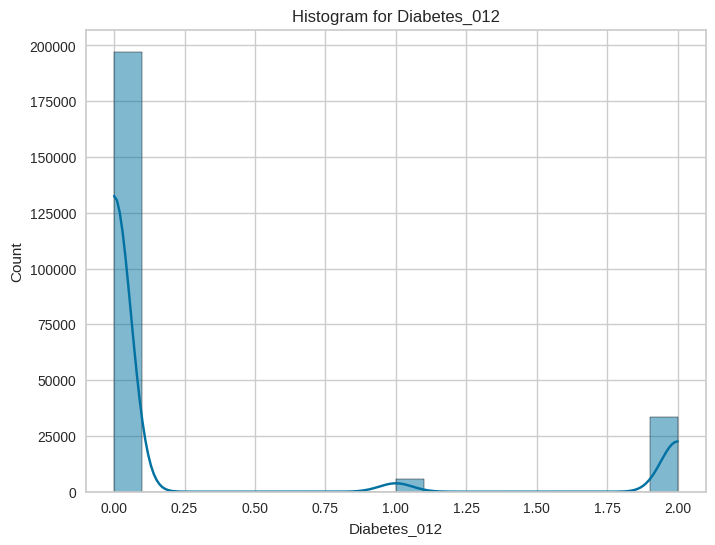

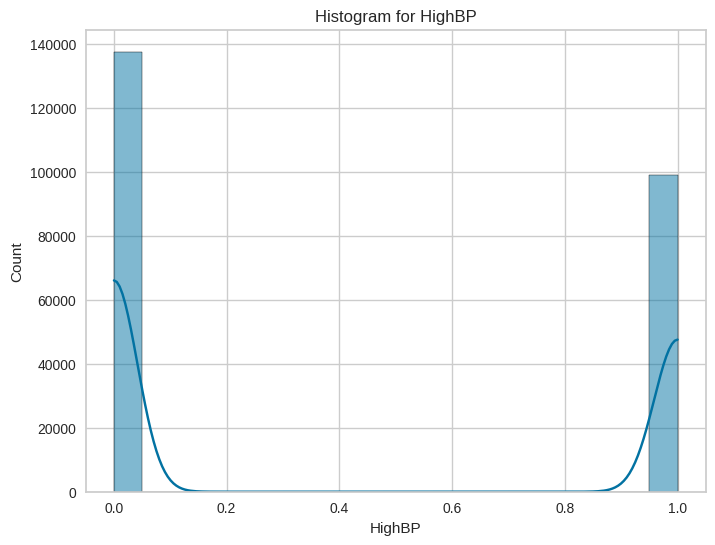

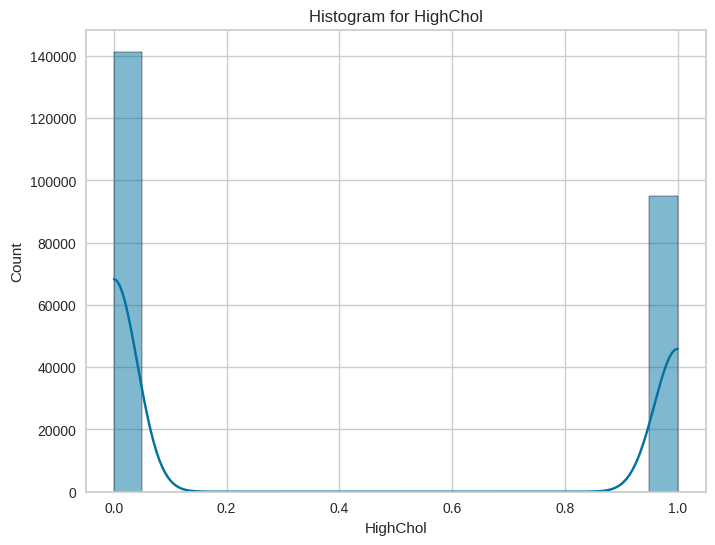

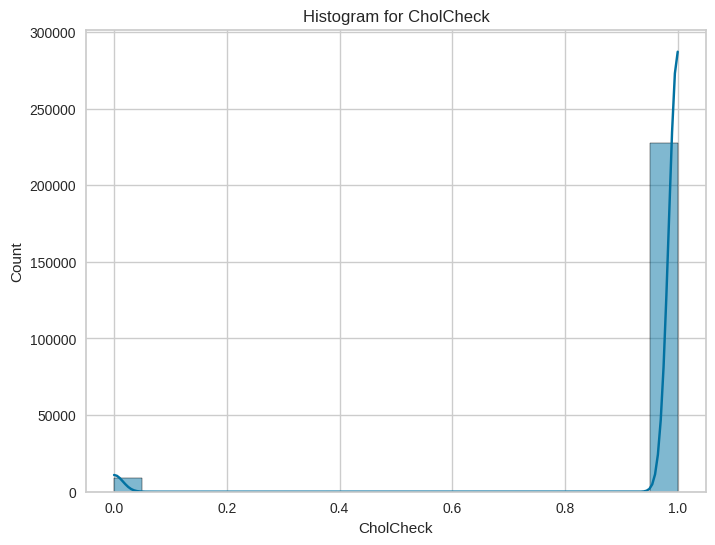

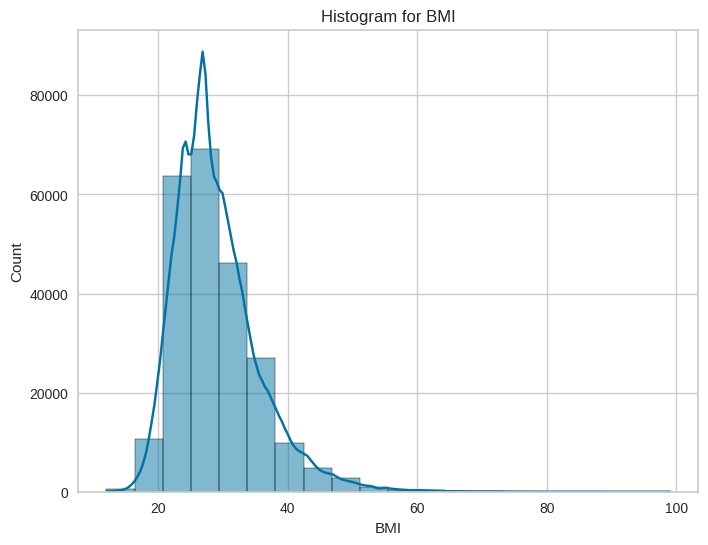

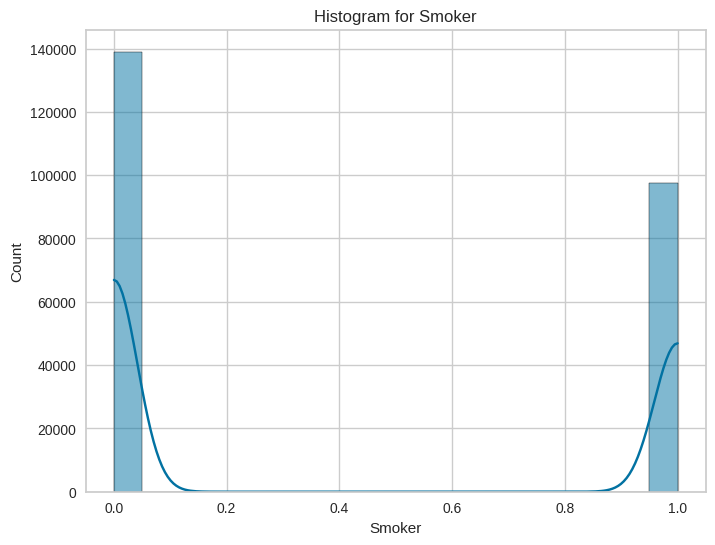

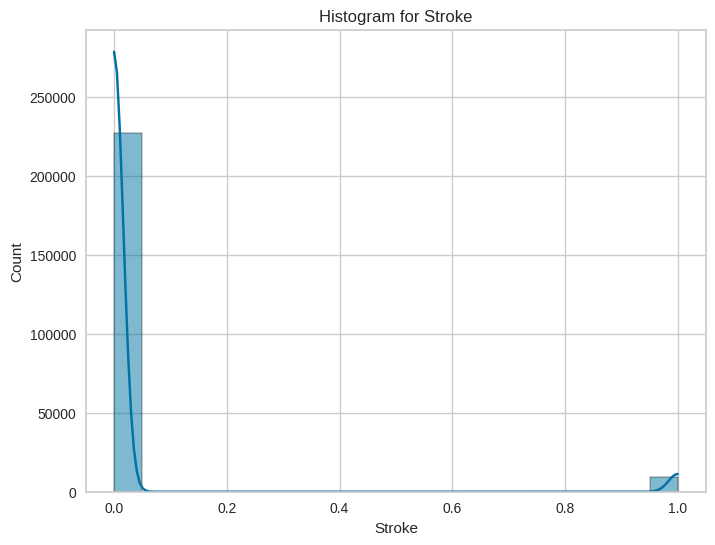

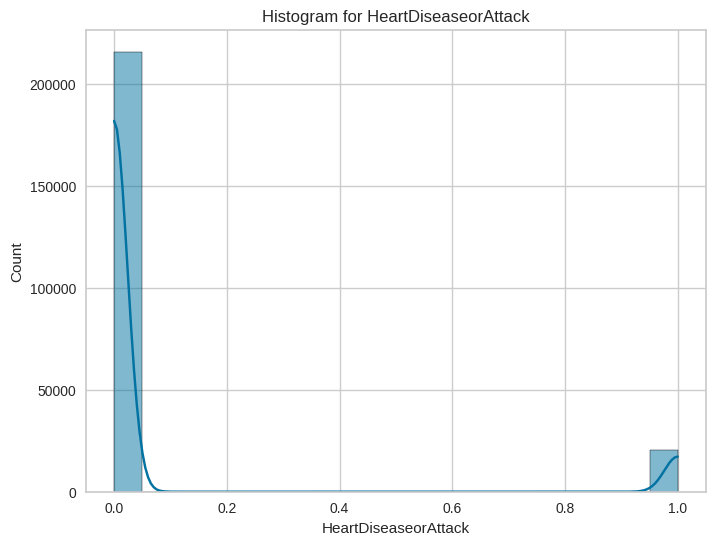

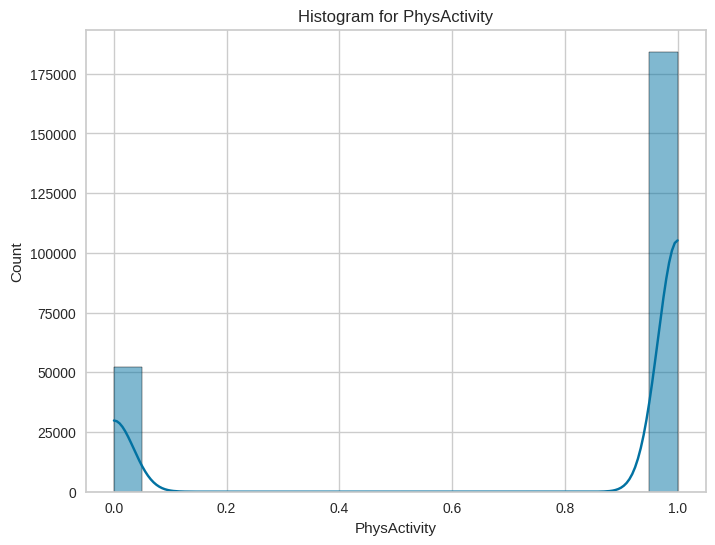

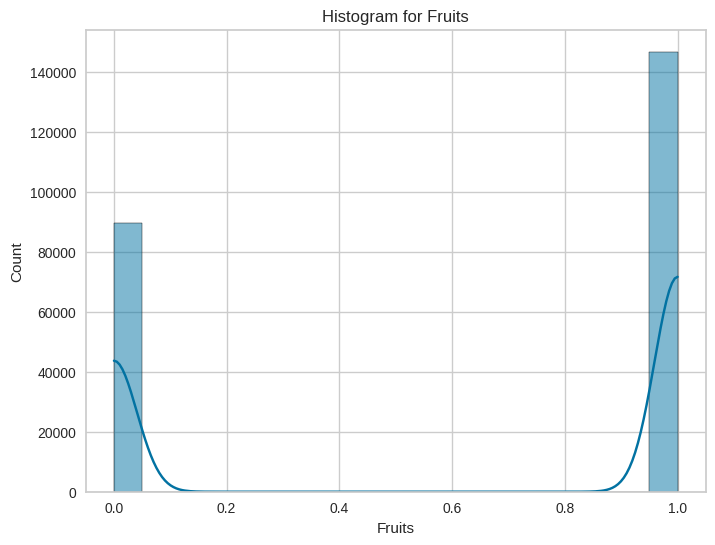

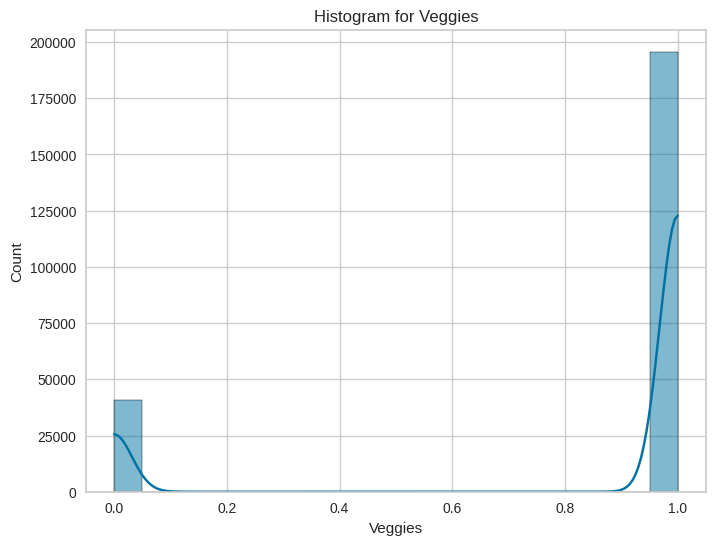

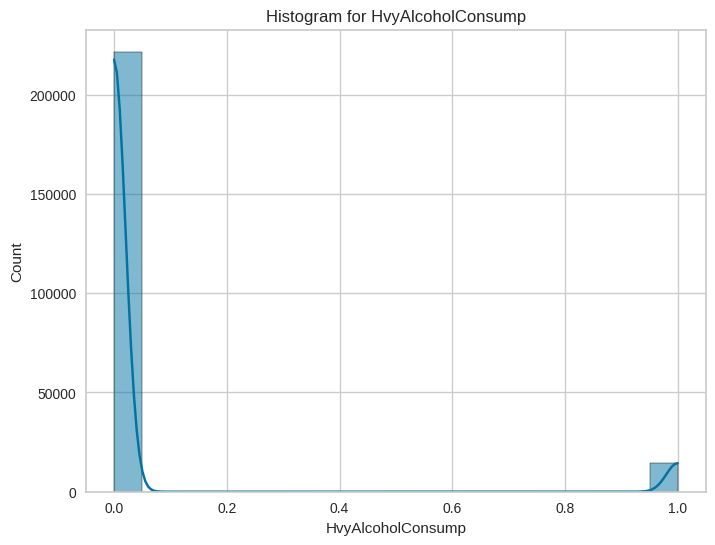

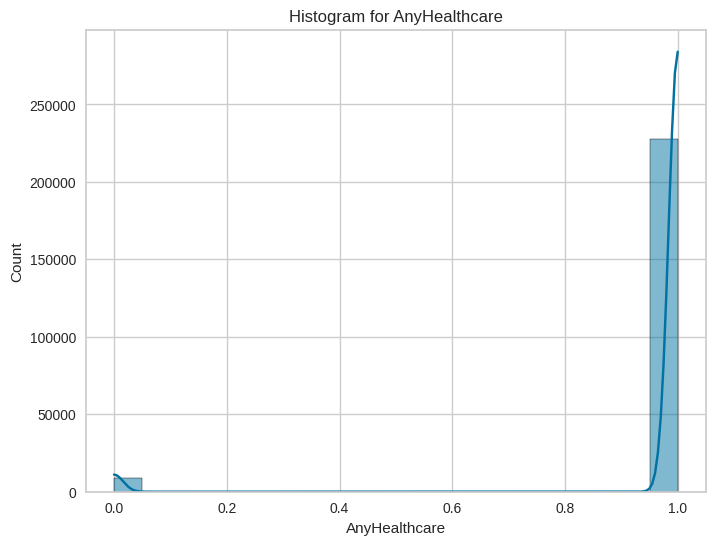

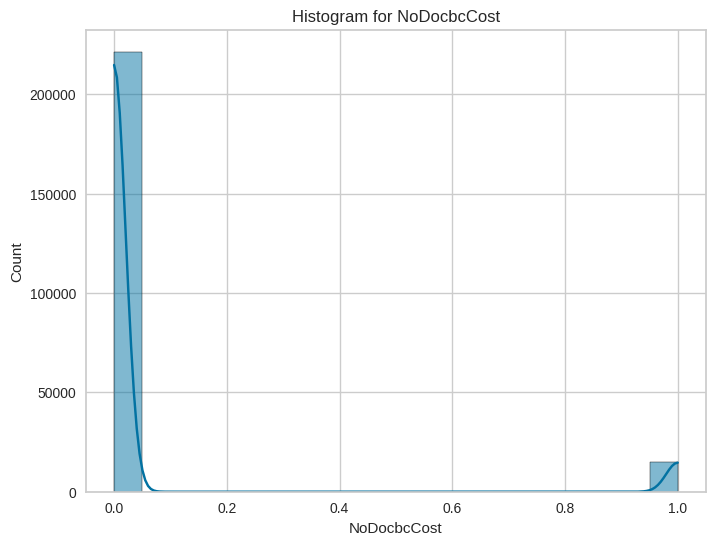

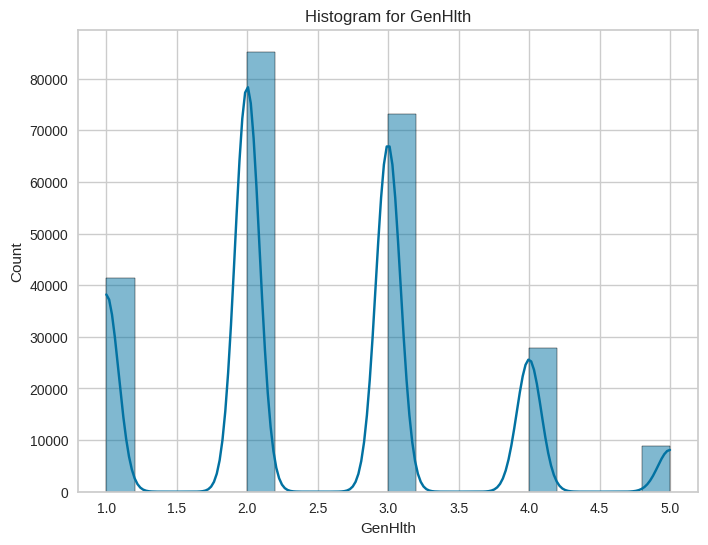

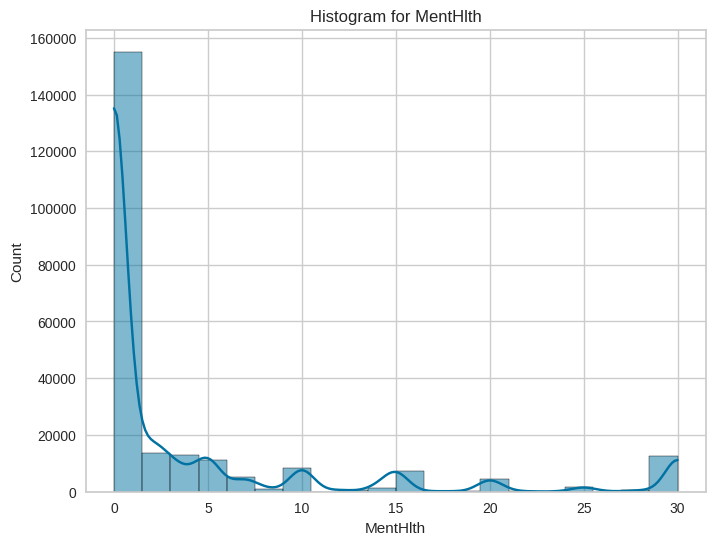

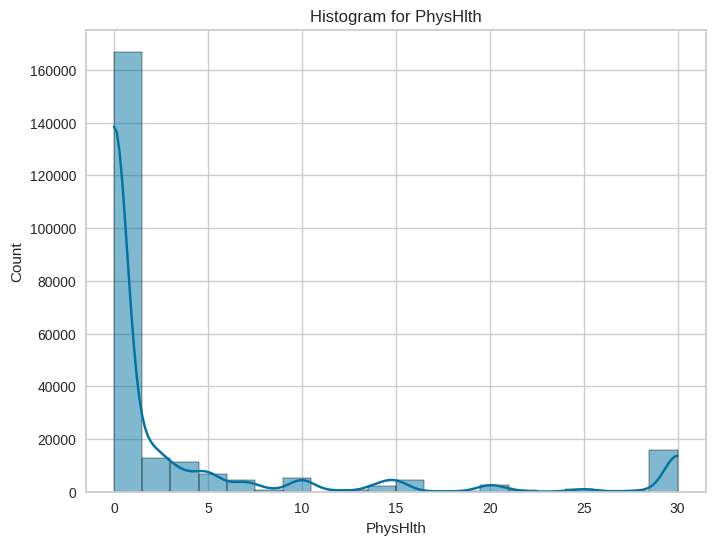

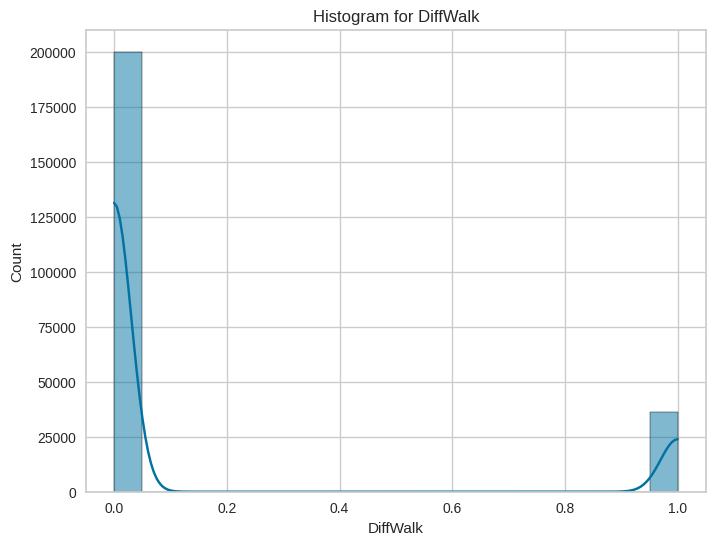

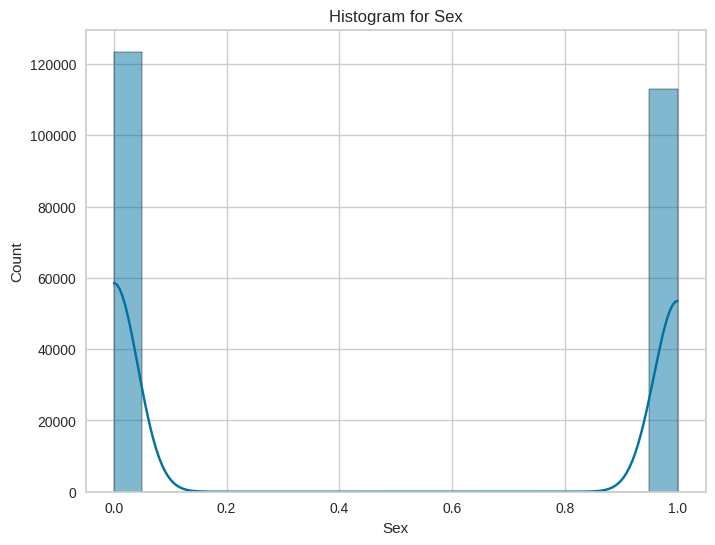

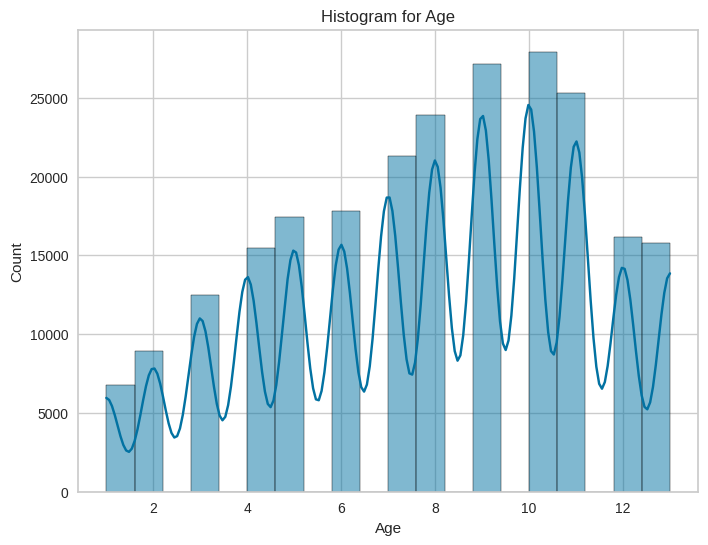

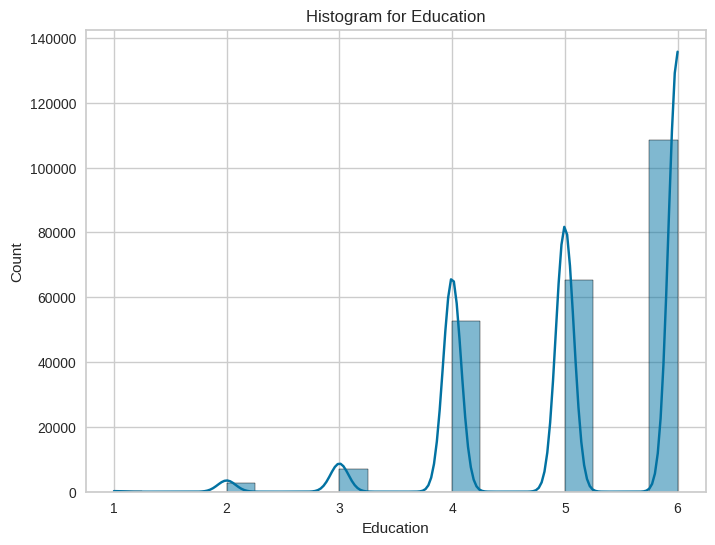

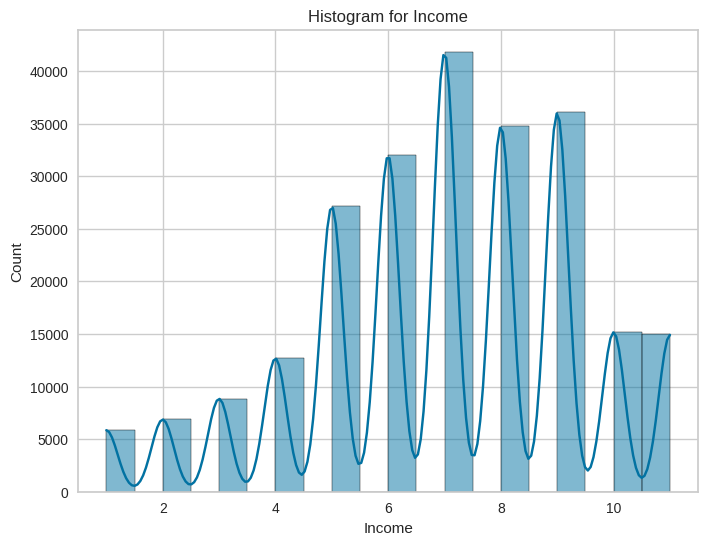

In [11]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

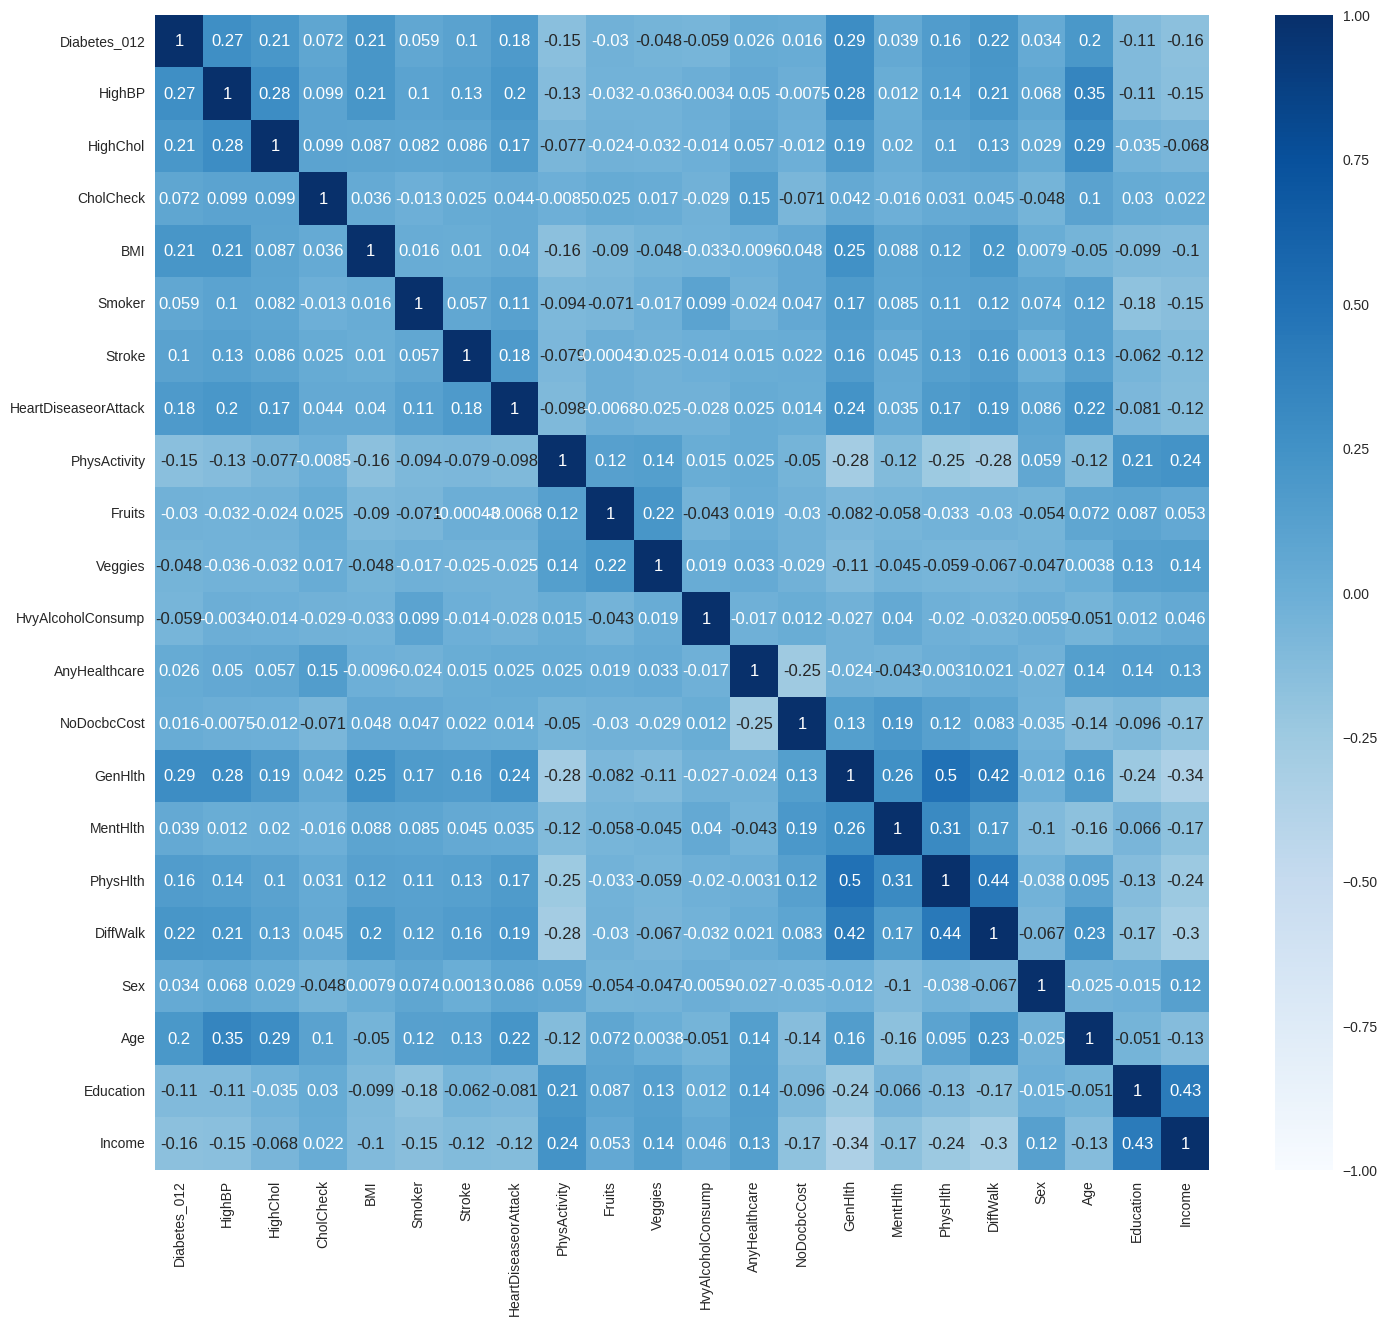

In [12]:
plt.figure(figsize=(17,15))
fig = sns.heatmap(data.corr(),annot=True,cmap='Blues',vmin=-1.0,vmax=1.0)
plt.show(fig)


In [13]:
"""data['BMI_category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

data['HighChol_or_HighBP'] = data['HighChol'] | data['HighBP']

data = data.drop(['BMI', 'HighChol', 'HighBP'], axis=1)"""

"data['BMI_category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])\n\ndata['HighChol_or_HighBP'] = data['HighChol'] | data['HighBP']\n\ndata = data.drop(['BMI', 'HighChol', 'HighBP'], axis=1)"

In [14]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

In [15]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep components that explain at least 95% of the variance
X_pca = pca.fit_transform(X_standardized)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8407860225061342


In [23]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [24]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)


In [25]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Best Model Parameters:", grid_search.best_params_)
print(f"Tuned Model Accuracy: {accuracy_tuned}")


Best Model Parameters: {'C': 0.001}
Tuned Model Accuracy: 0.8409763939419579
